# EDA - Projeto 3 TecWeb 2021.2

Os datasets que estamos trabalhando foram dados extraídos dos sites Lopes e Vida real, com o auxílio da ferramenta de scrapping, Beautiful Soup

No processo de extração, coletemos os seguintes dados

> <b>Imóvel</b>: Tipo de imóvel

> <b>Preço</b>: Preço total, incluindo IPTU e outros custos

> <b>Aluguel</b>: Preço do aluguel

> <b>Bairro</b>: Localização

> <b>Área</b>: Metragem

> <b>Quartos</b>: Número de quartos

> <b>Banheiros</b>: Número de banheiros 

> <b>Vagas</b>: Número de vagas 


In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

___
# Análise Preliminar

Antes de realizarmos nossa análise exploratória, vamos dar uma olhada nos dados e vermos se precisamos realizar alguma alteração ou tratamento

In [2]:
df_lopes = pd.read_csv("./data/dados_anuncios_lopes_imoveis.csv", decimal=",")
df_vr = pd.read_csv("./data/Viva_real.csv")

In [3]:
df_lopes.head(10)

,Imóvel,Preço (R$),Aluguel (R$),Bairro,Área (m²),Quartos,Banheiros,Vagas
0,Apartamento,2.478,1750,Santana,62,2,2,1
1,Apartamento,3.020,2300,Santana,72,2,2,1
2,Condomínio,59.600,50000,Alto Da Boa Vista,594,4,6,4
3,Apartamento,64.990,50000,Alto De Pinheiros,644,4,6,8
4,Apartamento,18.809,13000,Vila Madalena,280,4,5,5
5,Sobrado,19.400,18000,Santana,597,4,7,6
6,Apartamento,4.380,3000,Santana,78,3,2,2
7,Apartamento,2.808,2000,Bela Vista,48,1,1,1
8,Apartamento,4.383,3300,Vila Mariana,100,3,3,1
9,Salas,2.594,1400,Jardim América,40,0,1,0


In [4]:
df_vr.head(10)

,Unnamed: 0,Imóvel,Preço (R$),Aluguel (R$),Bairro,Área (m²),Quartos,Banheiros,Vagas
0,0,Apartamento,590,1100,Vila Andrade,35,1,1,1
1,1,Apartamento,1190,7750,Itaim Bibi,117,2,2,1
2,2,Sala/Conjunto,0,2500,Brooklin,70,0,2,3
3,3,Apartamento,651,1500,Vila Água Funda,75,2,2,1
4,4,Apartamento,1150,3200,Vila Mariana,110,3,2,1
5,5,Apartamento,600,8500,Vila Nova Conceição,100,3,3,1
6,6,Apartamento,850,5900,Sumaré,74,2,3,2
7,7,Apartamento,450,3200,Indianópolis,36,1,1,0
8,8,Apartamento,0,1350,Vila Madalena,24,1,1,0
9,9,Apartamento,536,2800,Brooklin,47,1,1,1


In [5]:
print(df_lopes.info())
print("")
print(df_vr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Imóvel        429 non-null    object
 1   Preço (R$)    429 non-null    object
 2   Aluguel (R$)  429 non-null    int64 
 3   Bairro        429 non-null    object
 4   Área (m²)     429 non-null    int64 
 5   Quartos       429 non-null    int64 
 6   Banheiros     429 non-null    int64 
 7   Vagas         429 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 26.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8964 entries, 0 to 8963
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    8964 non-null   int64 
 1   Imóvel        8964 non-null   object
 2   Preço (R$)    8964 non-null   int64 
 3   Aluguel (R$)  8964 non-null   int64 
 4   Bairro        8964 non-null   object
 5   Área (m²)     

___
# Tratamento dos dados

In [6]:
# Retirando a coluna extra
df_vr.drop(columns=df_vr.columns[0], inplace = True)

In [7]:
df_vr

,Imóvel,Preço (R$),Aluguel (R$),Bairro,Área (m²),Quartos,Banheiros,Vagas
0,Apartamento,590,1100,Vila Andrade,35,1,1,1
1,Apartamento,1190,7750,Itaim Bibi,117,2,2,1
2,Sala/Conjunto,0,2500,Brooklin,70,0,2,3
3,Apartamento,651,1500,Vila Água Funda,75,2,2,1
4,Apartamento,1150,3200,Vila Mariana,110,3,2,1
...,...,...,...,...,...,...,...,...
8959,Apartamento,250,1051,Liberdade,30,1,1,0
8960,Sala/Conjunto,0,2800,Santa Cecília,88,0,2,0
8961,Apartamento,650,1700,Consolação,50,2,1,1
8962,Apartamento,925,3999,Itaim Bibi,95,2,1,0


In [8]:
df_lopes

,Imóvel,Preço (R$),Aluguel (R$),Bairro,Área (m²),Quartos,Banheiros,Vagas
0,Apartamento,2.478,1750,Santana,62,2,2,1
1,Apartamento,3.020,2300,Santana,72,2,2,1
2,Condomínio,59.600,50000,Alto Da Boa Vista,594,4,6,4
3,Apartamento,64.990,50000,Alto De Pinheiros,644,4,6,8
4,Apartamento,18.809,13000,Vila Madalena,280,4,5,5
...,...,...,...,...,...,...,...,...
424,Apartamento,2.222,1800,Vila Anastácio,48,2,1,1
425,Apartamento,13.261,10000,Jardim América,180,4,3,2
426,Casa,25.900,20000,Alto Da Boa Vista,587,4,1,4
427,Casa de vila,1.300,1300,Santana,60,1,1,0


In [9]:
# Transformando as features categóricas em númericas 
df_lopes["Preço (R$)"] = df_lopes["Preço (R$)"].str.replace(".","")
df_lopes["Preço (R$)"] = df_lopes["Preço (R$)"].astype(str).astype(int)

In [10]:
print(df_lopes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Imóvel        429 non-null    object
 1   Preço (R$)    429 non-null    int32 
 2   Aluguel (R$)  429 non-null    int64 
 3   Bairro        429 non-null    object
 4   Área (m²)     429 non-null    int64 
 5   Quartos       429 non-null    int64 
 6   Banheiros     429 non-null    int64 
 7   Vagas         429 non-null    int64 
dtypes: int32(1), int64(5), object(2)
memory usage: 25.3+ KB
None


___
# Análise Exploratória

Com a análise preliminar feita e com os dados tratados, podemos iniciar nossa EDA

## 1. Estatísticas

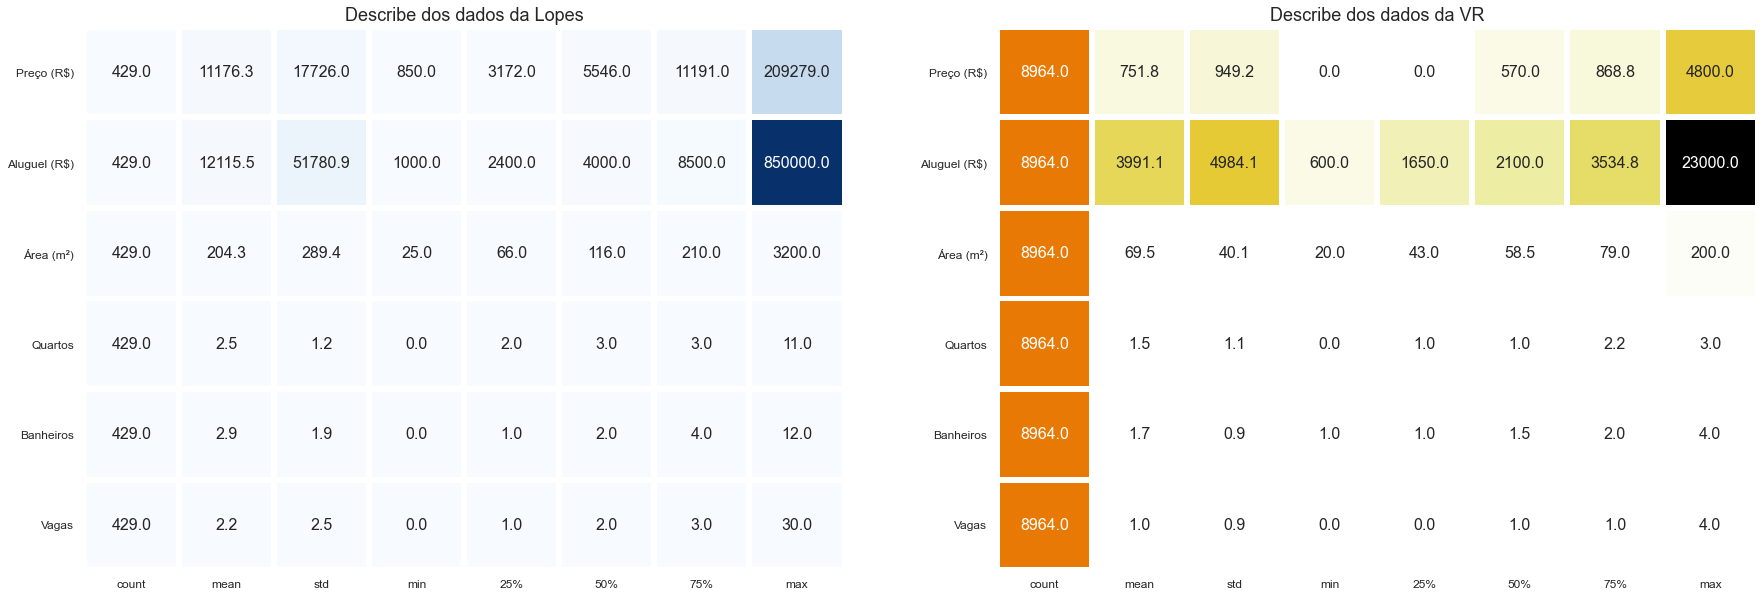

In [11]:
plt.figure(figsize = (30,10))

plt.subplot(1,2,1)
ax = sns.heatmap(df_lopes.describe().T, 
                 cmap = 'Blues', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Describe dos dados da Lopes', fontsize = 18)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0);

plt.subplot(1,2,2)
ax = sns.heatmap(df_vr.describe().T, 
                 cmap = 'CMRmap_r', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Describe dos dados da VR', fontsize = 18)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0);

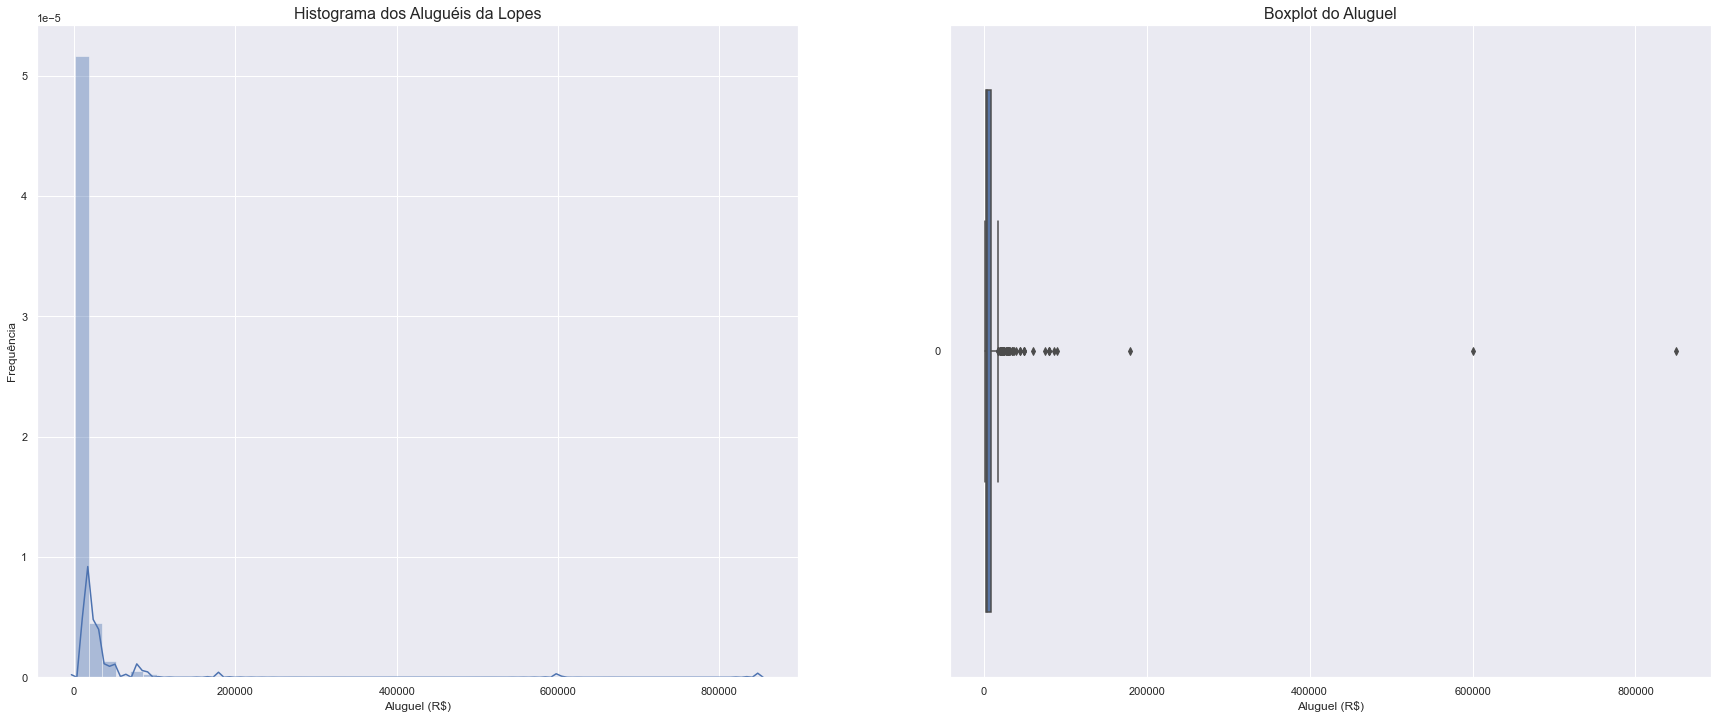

In [12]:
plt.figure(figsize=(30,12))

plt.subplot(1,2,1)
ax1 = sns.distplot(df_lopes['Aluguel (R$)'])
ax1.set_title('Histograma dos Aluguéis da Lopes', fontsize = 16)
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Aluguel (R$)')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = df_lopes['Aluguel (R$)'], orient='h')
ax2.set_title('Boxplot do Aluguel',fontsize = 16)
ax2.set_xlabel('Aluguel (R$)')

plt.show()

Observamos que a variável `Aluguel`, dos dados obtidos da Lopes, possi um compartamento assimétrico a direita, o que faz sentido, já que é normal possuir mais anúncios baratos e acessíveis para a maioria dos usuários, tendo menos anúncios caros, reservados àqueles que queiram pagar em um lugar mais luxuoso. O bloxplot, a direita, demonstra justamente essa concentração do nosso intervalo interquatílico mais a esquerda. Também, podemos observar esses lugares mais luxuosos em forma de outliers.

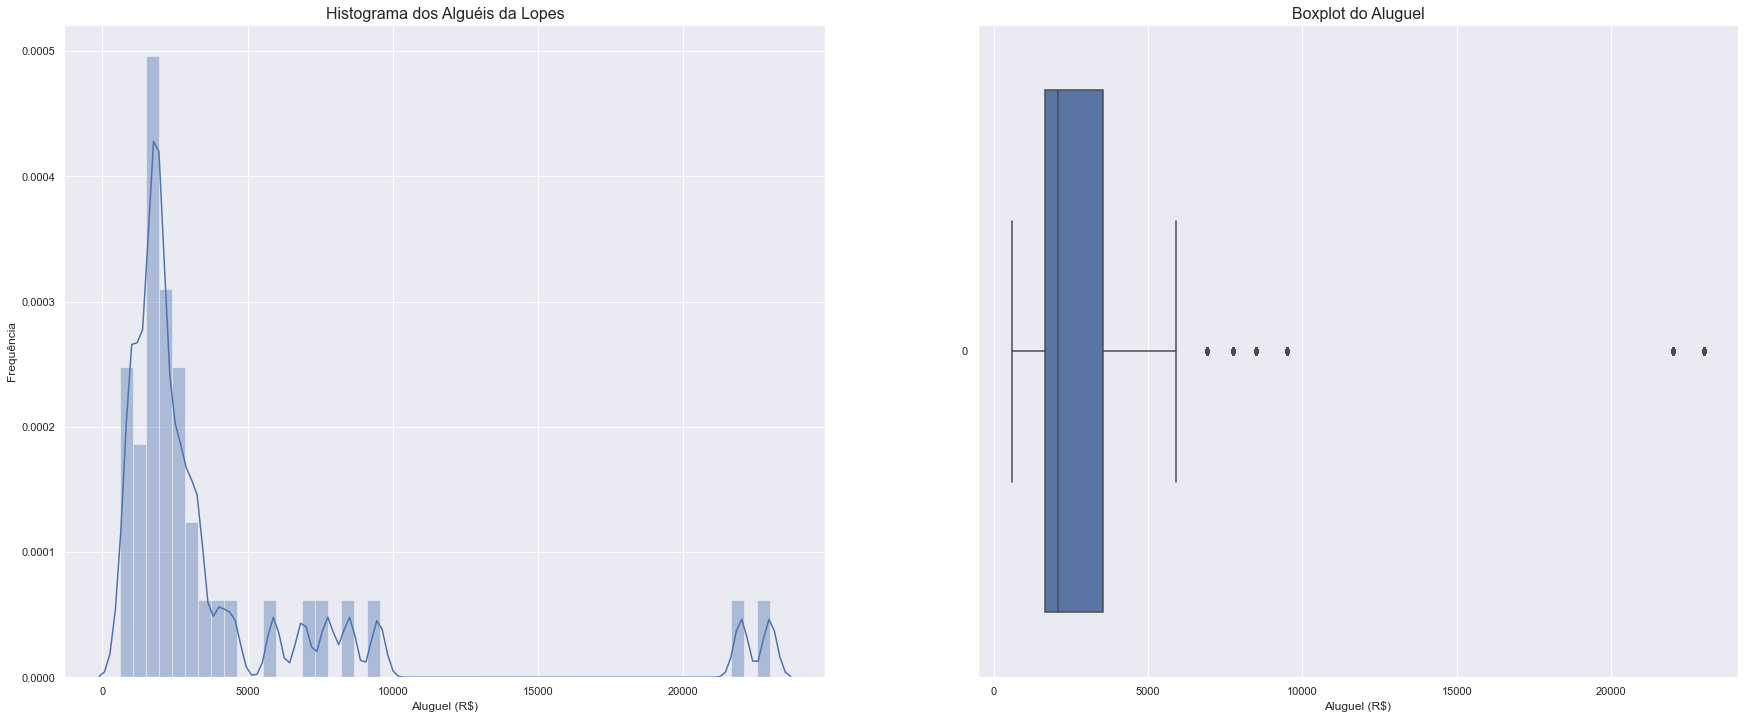

In [13]:
plt.figure(figsize=(30,12))

plt.subplot(1,2,1)
ax1 = sns.distplot(df_vr['Aluguel (R$)'])
ax1.set_title('Histograma dos Alguéis da Lopes', fontsize = 16)
ax1.set_ylabel('Frequência')
ax1.set_xlabel('Aluguel (R$)')

plt.subplot(1,2,2)
ax2 = sns.boxplot(data = df_vr['Aluguel (R$)'], orient='h')
ax2.set_title('Boxplot do Aluguel',fontsize = 16)
ax2.set_xlabel('Aluguel (R$)')

plt.show()

Já nos dados da Vida Real, temos o mesmo padrão repetido. O que era de se esperar, pois ambas empresas trabalham no mesmo segmento.  

In [14]:
group_bairro_preco = df_lopes.groupby(by = 'Bairro').mean()['Aluguel (R$)'].sort_values(ascending = False)

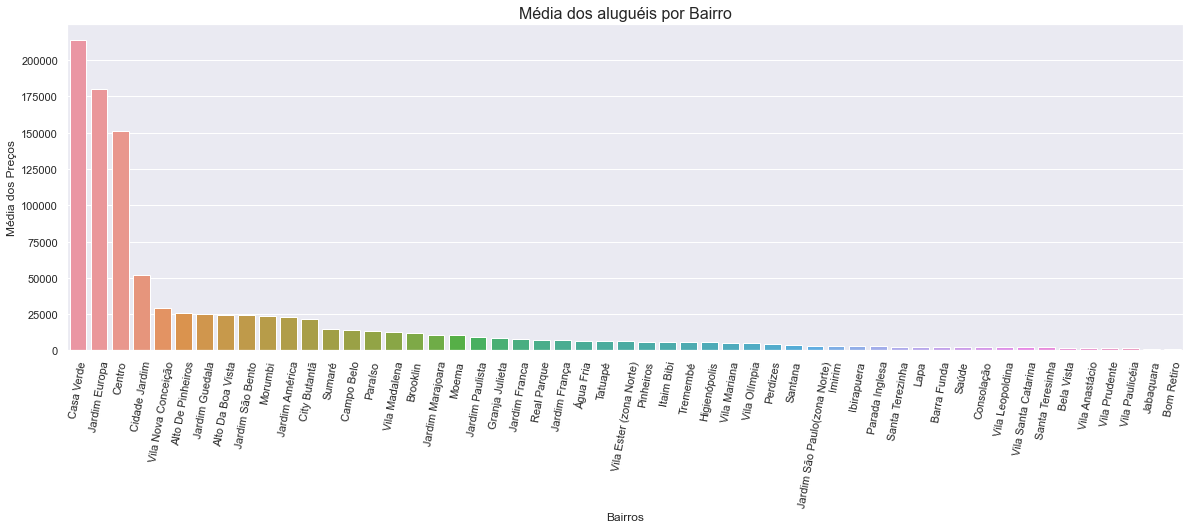

In [15]:
ax = sns.barplot(x = group_bairro_preco.index, y = group_bairro_preco.values)
ax.set_title('Média dos aluguéis por Bairro', fontsize = 16)
ax.set_ylabel('Média dos Preços')
ax.set_xlabel('Bairros')
ax.figure.set_size_inches(20,6)
plt.xticks(rotation=80);

Agrupamos os dados da Lopes a partir da variável `Bairros`. Em seguida, calculamos o aluguel médio para cada bairro, e podemos observar que a *Casa Verde* possui os anúncios mais caros, seguido do *Jardim Europa* e *Centro*.

In [16]:
group_bairro_preco = df_vr.groupby(by = 'Bairro').mean()['Aluguel (R$)'].sort_values(ascending = False)

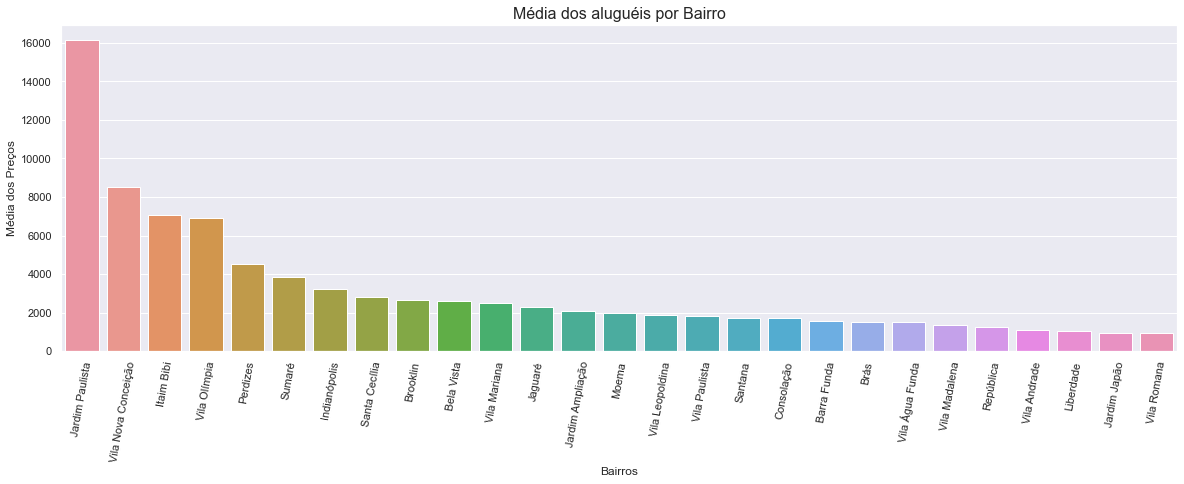

In [17]:
ax = sns.barplot(x = group_bairro_preco.index, y = group_bairro_preco.values)
ax.set_title('Média dos aluguéis por Bairro', fontsize = 16)
ax.set_ylabel('Média dos Preços')
ax.set_xlabel('Bairros')
ax.figure.set_size_inches(20,6)
plt.xticks(rotation=80);

Agora, nos dados da VR, temos que o bairro com o alguel mais caro está na região de Jardim Paulista, seguindo a Vila Nova Conceição e Itaim Bibi.

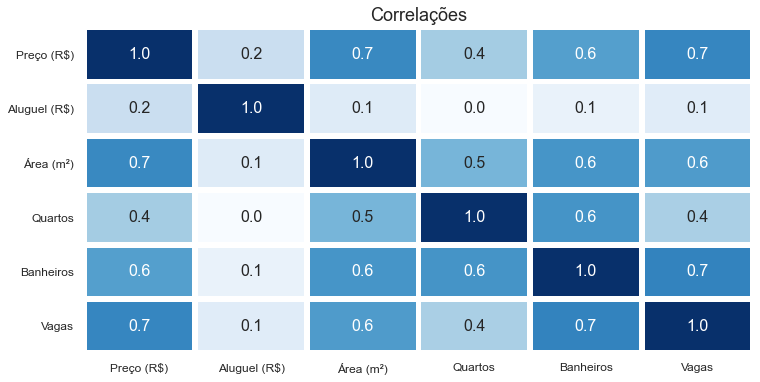

In [18]:
plt.figure(figsize = (12,6))
ax = sns.heatmap(df_lopes.corr(), 
                 cmap = 'Blues', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Correlações', fontsize = 18)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 12, rotation = 0);

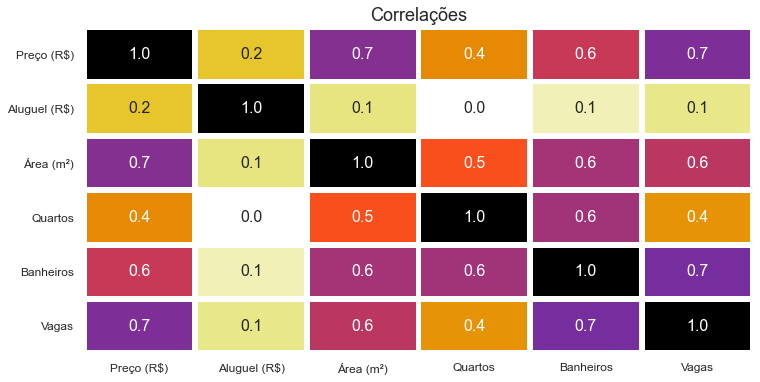

In [19]:
plt.figure(figsize = (12,6))
ax = sns.heatmap(df_lopes.corr(), 
                 cmap = 'CMRmap_r', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Correlações', fontsize = 18)
plt.xticks(size = 12, rotation = 0)
plt.yticks(size = 12, rotation = 0);

___
# Regressão

Vamos realizar uma regressão linear para vermos se as features extráidas são boas para prever o preço de aluguel.

Para esta etapa, vamos concatenar os dois dataframes e realizarmos apenas uma regressão.

In [21]:
data = pd.concat([df_lopes, df_vr])

In [23]:
data = pd.get_dummies(data, columns = ['Bairro', 'Imóvel'])

In [24]:
data.head(10)

,Preço (R$),Aluguel (R$),Área (m²),Quartos,Banheiros,Vagas,Bairro_Alto Da Boa Vista,Bairro_Alto De Pinheiros,Bairro_Barra Funda,Bairro_Bela Vista,...,Imóvel_Casa de vila,Imóvel_Casa térrea,Imóvel_Cobertura,Imóvel_Condomínio,Imóvel_Duplex,Imóvel_Lajes Corporativas,Imóvel_Sala/Conjunto,Imóvel_Salas,Imóvel_Sobrado,Imóvel_Studio
0,2478,1750,62,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3020,2300,72,2,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59600,50000,594,4,6,4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,64990,50000,644,4,6,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18809,13000,280,4,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,19400,18000,597,4,7,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,4380,3000,78,3,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2808,2000,48,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,4383,3300,100,3,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2594,1400,40,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
import statsmodels.api as sm # Importe da biblioteca

In [26]:
X = data.drop(columns = ['Aluguel (R$)', 'Preço (R$)'])
Y = data["Aluguel (R$)"]

In [27]:
X

,Área (m²),Quartos,Banheiros,Vagas,Bairro_Alto Da Boa Vista,Bairro_Alto De Pinheiros,Bairro_Barra Funda,Bairro_Bela Vista,Bairro_Bom Retiro,Bairro_Brooklin,...,Imóvel_Casa de vila,Imóvel_Casa térrea,Imóvel_Cobertura,Imóvel_Condomínio,Imóvel_Duplex,Imóvel_Lajes Corporativas,Imóvel_Sala/Conjunto,Imóvel_Salas,Imóvel_Sobrado,Imóvel_Studio
0,62,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,594,4,6,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,644,4,6,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,280,4,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8959,30,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8960,88,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8961,50,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8962,95,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X = sm.add_constant(X)

In [29]:
model = sm.OLS(Y, X)

results = model.fit()   

# Mostra os resultados
results.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Aluguel (R$)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     98.77
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        14:32:13   Log-Likelihood:                -98848.
No. Observations:                9393   AIC:                         1.979e+05
Df Residuals:                    9313   BIC:                         1.984e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                1.883e+04   1491.054     12.630      0.000    1.59e+04    2.18e+04
Área (m²)                              23.6277      2.340     10.098      0.000      19.041      28.214
Quartos                              1011.2370    327.540      3.087      0.002     369.187    1653.287
Banheiros                             908.4092    279.105      3.255      0.001     361.302    1455.516
Vagas                                1361.0412    231.791      5.872      0.000     906.681    1815.402
Bairro_Alto Da Boa Vista            -1.006e+04   3985.389     -2.523      0.012   -1.79e+04   -2243.177
Bairro_Alto De Pinheiros              257.5012   2509.357      0.103      0.918   -4661.387    5176.390
Bairro_Barra Funda                  -5452.9747    889.880     -6.128      0.000   -7197.334   -3708.615
Bairro_Bela Vista                   -1926.5606    966.999     -1.992      0.046   -3822.091     -31.030
Bairro_Bom Retiro                   -4502.9548   8933.987     -0.504      0.614    -2.2e+04     1.3e+04
Bairro_Brooklin                     -5056.9507    922.782     -5.480      0.000   -6865.805   -3248.097
Bairro_Brás                         -5222.2301   1000.981     -5.217      0.000   -7184.371   -3260.089
Bairro_Campo Belo                   -5242.6401   4694.107     -1.117      0.264   -1.44e+04    3958.836
Bairro_Casa Verde                    1.028e+05   5501.557     18.681      0.000     9.2e+04    1.14e+05
Bairro_Centro                        1.467e+05   4519.755     32.463      0.000    1.38e+05    1.56e+05
Bairro_Cidade Jardim                 3649.1628   6801.767      0.537      0.592   -9683.789     1.7e+04
Bairro_City Butantã                 -8472.2745   9092.319     -0.932      0.351   -2.63e+04    9350.659
Bairro_Consolação                   -5021.9692    995.764     -5.043      0.000   -6973.884   -3070.054
Bairro_Granja Julieta               -1.074e+04   1.05e+04     -1.027      0.305   -3.12e+04    9761.803
Bairro_Higienópolis                 -4978.2385   3239.390     -1.537      0.124   -1.13e+04    1371.675
Bairro_Ibirapuera                   -3674.9747   8935.652     -0.411      0.681   -2.12e+04    1.38e+04
Bairro_Imirim                       -5272.7982   9084.577     -0.580      0.562   -2.31e+04    1.25e+04
Bairro_Indianópolis                  -842.7921    987.166     -0.854      0.393   -2777.853    1092.269
Bairro_Itaim Bibi                   -2716.9998    838.640     -3.240      0.001   -4360.917   -1073.082
Bairro_Jabaquara                    -5801.6451   6344.561     -0.914      0.361   -1.82e+04    6635.083
Bairro_Jaguaré                      -8199.0986   1044.640     -7.849      0.000   -1.02e+04   -6151.376
Bairro_Jardim Ampliação             -8469.9816   1043.033     -8.12

## Conclusões

O $R^2$ e o $R^2$ ajustado mostram que o modelo não teve uma boa performance. Isso demonstra que há outras variáveis, além das retiradas no scrapping, que possam nos favorecer na predição. Também, alguns bairros apresenteram um p-valor mais alto que a siginificância de 5%, mostrando que alguns bairros não estão correlacionados aos preços de aluguel, levando a crer, de fato, que outras variáveis possuem um impacto maior em cima dos preços de forma mais definitiva. Em relação às outras variáveis extraídas (menos `Bairro`), seus p-valores refutam a hipótese nula da não colinearidade, o que nos fornece a informação que essas features estão, de certa forma, correlacionadas ao preço de aluguel sugerido.  